In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import commons as cmns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Audio
sound_file = 'beep.wav'

In [81]:
data=pd.read_csv('all_BTC_Data.csv',sep=',')

In [82]:
data.interpolate(axis=0,inplace=True)

C:\Users\13275\AppData\Local\Temp\ipykernel_3008\879274293.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(axis=0,inplace=True)


In [83]:
interval1 = (data['Date'] >= '2021/04/01') & (data['Date'] <= '2024/04/01')
interval2=(data['Date'] >= '2013/04/01') & (data['Date'] <= '2017/04/01')
interval3=(data['Date'] >= '2013/04/01') & (data['Date'] <= '2019/12/31')

In [84]:
one=data['priceUSD'].shift(-1,fill_value=1)
seven=data['priceUSD'].shift(-7,fill_value=1)
fourteen=data['priceUSD'].shift(-14,fill_value=1)
thirty=data['priceUSD'].shift(-30,fill_value=1)
sixty=data['priceUSD'].shift(-60,fill_value=1)
ninety=data['priceUSD'].shift(-90,fill_value=1)

In [85]:
df=data.loc[interval1]

In [86]:
df.shape

(1097, 738)

In [87]:
has_na = df.isna().any().any()
print("Are there any missing values in the DataFrame? ", has_na)

Are there any missing values in the DataFrame?  False


In [88]:
df['shifted']=ninety.loc[interval1]
df['difference']=((df['shifted']-df['priceUSD'])/df['shifted'])*100
df.head

C:\Users\13275\AppData\Local\Temp\ipykernel_3008\30605466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shifted']=ninety.loc[interval1]
C:\Users\13275\AppData\Local\Temp\ipykernel_3008\30605466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['difference']=((df['shifted']-df['priceUSD'])/df['shifted'])*100


<bound method NDFrame.head of       Unnamed: 0        Date  priceUSD  transactions    size  sentbyaddress  \
1339        1339  2021/04/01     58868        311794  886005         561167   
1340        1340  2021/04/02     59266        305648  884061         558303   
1341        1341  2021/04/03     58933        281586  884107         480392   
1342        1342  2021/04/04     57705        245861  874973         413606   
1343        1343  2021/04/05     58085        288890  862111         527581   
...          ...         ...       ...           ...     ...            ...   
2431        2431  2024/03/28     70379        428518  777971         489542   
2432        2432  2024/03/29     70055        449277  758385         470047   
2433        2433  2024/03/30     69970        489917  722330         449461   
2434        2434  2024/03/31     70429        319538  567017         377686   
2435        2435  2024/04/01     69724        326260  647947         426956   

          difficulty 

In [89]:
df.reset_index(drop=True,inplace=True)

In [90]:
category=[]
for x in range(len(df['difference'])):
    if df['difference'][x]>=0:
        category.append(1)
    else:
        category.append(0)

In [91]:
sum(category)

536

In [92]:
df['category']=pd.DataFrame(category)

C:\Users\13275\AppData\Local\Temp\ipykernel_3008\3761637505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category']=pd.DataFrame(category)


In [93]:
df.shape

(1097, 741)

In [94]:
hashrate_cols = [col for col in df.columns if 'hashrate' in col]
difficulty_cols = [col for col in df.columns if 'difficulty' in col]
# Check for any NaN values in the DataFrame before the transformation
print("NaN values before transformation:\n", df.isna().sum())

# Ensure there are no negative values that could cause issues
negative_values_hashrate = (df[hashrate_cols] < 0).any()
negative_values_difficulty = (df[difficulty_cols] < 0).any()
print("Negative values in 'hashrate' columns:", negative_values_hashrate)
print("Negative values in 'difficulty' columns:", negative_values_difficulty)

# Apply the transformation safely
for col in hashrate_cols + difficulty_cols:
    # Ensure no negative or zero values make it into the log transformation
    df[col] = np.log(df[col].clip(lower=0) + 1)


NaN values before transformation:
 Unnamed: 0       0
Date             0
priceUSD         0
transactions     0
size             0
                ..
price30rocUSD    0
price90rocUSD    0
shifted          0
difference       0
category         0
Length: 741, dtype: int64
Negative values in 'hashrate' columns: hashrate         False
hashrate3sma     False
hashrate7sma     False
hashrate14sma    False
hashrate30sma    False
hashrate90sma    False
hashrate3ema     False
hashrate7ema     False
hashrate14ema    False
hashrate30ema    False
hashrate90ema    False
hashrate3wma     False
hashrate7wma     False
hashrate14wma    False
hashrate30wma    False
hashrate90wma    False
hashrate3trx      True
hashrate7trx      True
hashrate14trx     True
hashrate30trx     True
hashrate90trx     True
hashrate3mom      True
hashrate7mom      True
hashrate14mom     True
hashrate30mom     True
hashrate90mom     True
hashrate3std     False
hashrate7std     False
hashrate14std    False
hashrate30std    False
h

C:\Users\13275\AppData\Local\Temp\ipykernel_3008\4162253933.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.log(df[col].clip(lower=0) + 1)
C:\Users\13275\AppData\Local\Temp\ipykernel_3008\4162253933.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.log(df[col].clip(lower=0) + 1)
C:\Users\13275\AppData\Local\Temp\ipykernel_3008\4162253933.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [95]:
has_na = df.isna().any().any()
print("Are there any missing values in the DataFrame? ", has_na)

Are there any missing values in the DataFrame?  False


In [96]:
df.drop(columns=['shifted','difference'],inplace=True)

C:\Users\13275\AppData\Local\Temp\ipykernel_3008\1679840618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['shifted','difference'],inplace=True)


In [97]:
#df.dropna(inplace=True)

In [98]:
df

,Unnamed: 0,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,...,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD,category
0,1339,2021/04/01,58868,311794,886005,561167,30.715934,46.601628,0.338,32626194402,...,67.160,61.310,60.879,62.467,3.440,12.932,0.669,21.051,101.189,0
1,1340,2021/04/02,59266,305648,884061,558303,30.769327,46.533231,0.353,30385803529,...,69.082,62.222,61.272,62.629,1.572,11.386,1.695,17.576,93.031,0
2,1341,2021/04/03,58933,281586,884107,480392,30.772473,46.496784,0.341,21242591514,...,65.347,60.927,60.744,62.402,0.397,6.810,0.267,19.256,76.148,0
3,1342,2021/04/04,57705,245861,874973,413606,30.772473,46.558063,0.341,15740704522,...,53.013,56.272,58.809,61.568,-1.976,3.349,0.701,20.952,81.130,0
4,1343,2021/04/05,58085,288890,862111,527581,30.772473,46.587693,0.363,31203908995,...,56.012,57.358,59.225,61.728,-1.992,2.064,2.262,19.538,80.133,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2431,2024/03/28,70379,428518,777971,489542,32.055475,47.847046,0.115,27984614324,...,66.234,64.392,66.856,67.001,3.045,5.532,-2.522,24.766,65.917,0
1093,2432,2024/03/29,70055,449277,758385,470047,32.051391,47.824423,0.111,18774256168,...,63.668,63.171,66.183,66.680,-0.417,8.482,2.113,18.356,66.359,0
1094,2433,2024/03/30,69970,489917,722330,449461,32.051391,47.920289,0.108,10259465459,...,62.915,62.831,66.001,66.595,0.243,8.400,2.536,12.696,64.827,0
1095,2434,2024/03/31,70429,319538,567017,377686,32.051391,47.824008,0.106,10573446353,...,65.473,63.952,66.513,66.825,0.072,8.042,5.084,13.873,64.661,0


In [99]:
df.shape

(1097, 739)

In [100]:
USD=df['priceUSD']

In [101]:
X_raw=df.iloc[:,2:18]

In [102]:
X_raw

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,confirmationtime,transactionvalueUSD,mediantransactionvalueUSD,activeaddresses,top100cap,fee_to_rewardUSD
0,58868,311794,886005,561167,30.715934,46.601628,0.338,32626194402,16.992,8.579,9.931,257955,998.433,1002317,14.330,9.037
1,59266,305648,884061,558303,30.769327,46.533231,0.353,30385803529,17.337,8.719,10.286,268420,1003.000,937863,14.340,9.275
2,58933,281586,884107,480392,30.772473,46.496784,0.341,21242591514,17.568,8.787,10.992,280926,866.506,826749,14.319,9.303
3,57705,245861,874973,413606,30.772473,46.558063,0.341,15740704522,15.771,7.212,9.863,271675,744.380,893180,14.321,6.863
4,58085,288890,862111,527581,30.772473,46.587693,0.363,31203908995,18.992,8.591,9.231,352131,988.352,1040641,14.278,8.837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,70379,428518,777971,489542,32.055475,47.847046,0.115,27984614324,4.959,2.099,9.474,159777,154.790,839022,14.706,3.082
1093,70055,449277,758385,470047,32.051391,47.824423,0.111,18774256168,4.571,2.156,10.000,143788,81.233,732979,14.718,3.155
1094,69970,489917,722330,449461,32.051391,47.920289,0.108,10259465459,4.268,1.889,9.290,74296,0.700,726655,14.725,2.994
1095,70429,319538,567017,377686,32.051391,47.824008,0.106,10573446353,6.182,2.408,10.511,100447,146.819,614591,14.752,3.173


In [103]:
y=df.iloc[:,-1:]
y=np.ravel(y)

In [104]:
features_list=[]
technical_indicators=['sma','ema','wma','trx','mom','std','var','rsi','roc']
periods=['3','7','14','30','90']
for i in technical_indicators:
    for j in periods:
        string=str(j)+str(i)
        X=df.filter(like=string,axis=1)
        X=SimpleImputer(missing_values=0,strategy='most_frequent').fit_transform(X)
        X=pd.DataFrame(X)
        X.columns=df.filter(like=string,axis=1).columns
        rf1=RandomForestClassifier(random_state=7,n_jobs=-1)
        rfecv=RFECV(rf1,step=0.9,min_features_to_select=1,verbose=1,cv=5,scoring='neg_mean_absolute_error', n_jobs=-1)
        rfecv.fit(X,y)
        if rfecv.n_features_>1:
            rf1.fit(X,y)
            maximp=rf1.feature_importances_.max()
            for x in range(len(rf1.feature_importances_)):
                if maximp==rf1.feature_importances_[x]:
                    new_features = X.columns[x]
        else:
            mask = rfecv.get_support()
            new_features = X.columns[mask]
        features_list.append(str(new_features))
        print(string+': '+new_features)
#Audio(sound_file, autoplay=True)

3sma: difficulty3sma
7sma: difficulty7sma
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['14sma: difficulty14sma'], dtype='object')
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['30sma: difficulty30sma'], dtype='object')
Fitting estimator with 16 features.
90sma: mining_profitability90sma
3ema: difficulty3ema
7ema: difficulty7ema
14ema: difficulty14ema
30ema: sentinusd30emaUSD
90ema: sentbyaddress90ema
3wma: difficulty3wma
7wma: difficulty7wma
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['14wma: difficulty14wma'], dtype='object')
Fitting estimator with 16 features.
30wma: difficulty30wma
Fitting estimator with 16 features.
90wma: sentbyaddress90wma
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['3trx: mediantransactionvalue3trxUSD'], dtype='object')
Fitting estimator with 16 features.
Fitting estimator with 2 features.
Index(['7trx: mediantransactionvalue7trxUS

In [105]:
l1=[]
for j in range(len(features_list)):
    result1 = re.search("'(.*)'],", features_list[j])
    if result1!=None:
        l1.append(result1.group(1))
for i in range(len(features_list)):
    result2 = re.search('.*',features_list[i])
    if len(result2.group(0))<33:
        l1.append(result2.group(0))

In [106]:
l1.sort()

In [107]:
l1

['difficulty14ema',
 'difficulty14roc',
 'difficulty14sma',
 'difficulty14wma',
 'difficulty30sma',
 'difficulty30wma',
 'difficulty3ema',
 'difficulty3sma',
 'difficulty3wma',
 'difficulty7ema',
 'difficulty7sma',
 'difficulty7wma',
 'hashrate90std',
 'hashrate90var',
 'mediantransactionvalue14trxUSD',
 'mediantransactionvalue3trxUSD',
 'mediantransactionvalue7trxUSD',
 'mining_profitability90sma',
 'price90momUSD',
 'sentbyaddress90ema',
 'sentbyaddress90wma',
 'sentinusd14momUSD',
 'sentinusd14stdUSD',
 'sentinusd14varUSD',
 'sentinusd30emaUSD',
 'sentinusd30momUSD',
 'sentinusd30stdUSD',
 'sentinusd30trxUSD',
 'sentinusd30varUSD',
 'sentinusd3momUSD',
 'sentinusd3rocUSD',
 'sentinusd3stdUSD',
 'sentinusd3varUSD',
 'sentinusd7stdUSD',
 'sentinusd7varUSD',
 'sentinusd90trxUSD',
 'top100cap14rsi',
 'top100cap30roc',
 'top100cap30rsi',
 'top100cap3rsi',
 'top100cap7roc',
 'top100cap7rsi',
 'top100cap90roc',
 'top100cap90rsi',
 'transactionvalue7momUSD']

In [108]:
df_reduced=df[l1]

In [109]:
df_reduced.head()

,difficulty14ema,difficulty14roc,difficulty14sma,difficulty14wma,difficulty30sma,difficulty30wma,difficulty3ema,difficulty3sma,difficulty3wma,difficulty7ema,...,sentinusd90trxUSD,top100cap14rsi,top100cap30roc,top100cap30rsi,top100cap3rsi,top100cap7roc,top100cap7rsi,top100cap90roc,top100cap90rsi,transactionvalue7momUSD
0,30.713252,1.080448,30.714819,30.715785,30.706492,30.709937,30.715932,30.715934,30.715934,30.715506,...,0.846,66.008,2.442,67.343,65.565,0.010,60.606,8.559,58.497,-22604.0
1,30.720913,2.098754,30.719844,30.723220,30.708553,30.714098,30.742986,30.734050,30.742987,30.729236,...,0.841,67.071,2.030,67.731,77.067,0.402,63.818,9.100,58.648,4607.0
2,30.727943,1.919419,30.723974,30.730375,30.710721,30.718324,30.757838,30.752912,30.762212,30.740222,...,0.836,62.467,1.799,65.958,36.761,0.230,52.821,7.705,58.180,44738.0
3,30.733996,1.919419,30.728087,30.736937,30.712884,30.722394,30.765182,30.771426,30.771950,30.748382,...,0.829,62.763,1.271,66.057,41.684,0.282,53.820,8.058,58.216,64718.0
4,30.739213,1.919419,30.732183,30.742917,30.715425,30.726310,30.768834,30.772473,30.772473,30.754460,...,0.823,53.854,1.026,62.406,12.737,-0.344,36.344,7.123,57.239,50369.0


In [110]:
df_reduced.shape

(1097, 45)

In [111]:
X=cmns.drop_high_vif(df_reduced,thresh=5)

dropping 'sentinusd14stdUSD' at index: 22
dropping 'sentinusd30stdUSD' at index: 25
dropping 'sentinusd7stdUSD' at index: 31
dropping 'sentinusd3stdUSD' at index: 29
Remaining variables:
Index(['difficulty14ema', 'difficulty14roc', 'difficulty14sma',
       'difficulty14wma', 'difficulty30sma', 'difficulty30wma',
       'difficulty3ema', 'difficulty3sma', 'difficulty3wma', 'difficulty7ema',
       'difficulty7sma', 'difficulty7wma', 'hashrate90std', 'hashrate90var',
       'mediantransactionvalue14trxUSD', 'mediantransactionvalue3trxUSD',
       'mediantransactionvalue7trxUSD', 'mining_profitability90sma',
       'price90momUSD', 'sentbyaddress90ema', 'sentbyaddress90wma',
       'sentinusd14momUSD', 'sentinusd14varUSD', 'sentinusd30emaUSD',
       'sentinusd30momUSD', 'sentinusd30trxUSD', 'sentinusd30varUSD',
       'sentinusd3momUSD', 'sentinusd3rocUSD', 'sentinusd3varUSD',
       'sentinusd7varUSD', 'sentinusd90trxUSD', 'top100cap14rsi',
       'top100cap30roc', 'top100cap30rsi', 't

In [112]:
X.shape

(1097, 41)

In [113]:
cmns.vif_values(X)

difficulty14ema                   0.000686
difficulty14roc                   0.720568
difficulty14sma                   0.000688
difficulty14wma                   0.000692
difficulty30sma                   0.000671
difficulty30wma                   0.000680
difficulty3ema                    0.000699
difficulty3sma                    0.000699
difficulty3wma                    0.000700
difficulty7ema                    0.000694
difficulty7sma                    0.000695
difficulty7wma                    0.000697
hashrate90std                     0.000274
hashrate90var                     0.000282
mediantransactionvalue14trxUSD    1.000252
mediantransactionvalue3trxUSD     0.999089
mediantransactionvalue7trxUSD     1.001345
mining_profitability90sma         1.119852
price90momUSD                     1.012717
sentbyaddress90ema                0.012538
sentbyaddress90wma                0.017178
sentinusd14momUSD                 1.539402
sentinusd14varUSD                 3.808161
sentinusd30

In [114]:
Raw=cmns.drop_high_vif(X_raw,thresh=10)

dropping 'difficulty' at index: 4
dropping 'hashrate' at index: 4
dropping 'activeaddresses' at index: 11
dropping 'size' at index: 2
dropping 'sentbyaddress' at index: 2
dropping 'median_transaction_feeUSD' at index: 5
dropping 'confirmationtime' at index: 5
dropping 'priceUSD' at index: 0
dropping 'mining_profitability' at index: 1
dropping 'fee_to_rewardUSD' at index: 6
Remaining variables:
Index(['transactions', 'sentinusdUSD', 'transactionfeesUSD',
       'transactionvalueUSD', 'mediantransactionvalueUSD', 'top100cap'],
      dtype='object')


In [115]:
#cmns.vif_values(X_raw)
cmns.vif_values(Raw)

transactions                 2.073471
sentinusdUSD                 3.413164
transactionfeesUSD           1.822950
transactionvalueUSD          4.977911
mediantransactionvalueUSD    4.326727
top100cap                    1.013296
dtype: float64

In [116]:
Raw['Date']=df['Date']

C:\Users\13275\AppData\Local\Temp\ipykernel_3008\415555305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw['Date']=df['Date']


In [117]:
X['Date']=df['Date']

C:\Users\13275\AppData\Local\Temp\ipykernel_3008\3012381705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date']=df['Date']


In [118]:
df_merged=Raw.merge(X.drop_duplicates(subset='Date'),how='left')

In [119]:
df_merged.shape

(1097, 48)

In [120]:
df_merged.drop(columns='Date',inplace=True)

In [121]:
#df_merged['priceUSD']=np.ravel(y)

In [122]:
X=cmns.drop_high_vif(df_merged,thresh=5)

dropping 'sentinusdUSD' at index: 1
Remaining variables:
Index(['transactions', 'transactionfeesUSD', 'transactionvalueUSD',
       'mediantransactionvalueUSD', 'top100cap', 'difficulty14ema',
       'difficulty14roc', 'difficulty14sma', 'difficulty14wma',
       'difficulty30sma', 'difficulty30wma', 'difficulty3ema',
       'difficulty3sma', 'difficulty3wma', 'difficulty7ema', 'difficulty7sma',
       'difficulty7wma', 'hashrate90std', 'hashrate90var',
       'mediantransactionvalue14trxUSD', 'mediantransactionvalue3trxUSD',
       'mediantransactionvalue7trxUSD', 'mining_profitability90sma',
       'price90momUSD', 'sentbyaddress90ema', 'sentbyaddress90wma',
       'sentinusd14momUSD', 'sentinusd14varUSD', 'sentinusd30emaUSD',
       'sentinusd30momUSD', 'sentinusd30trxUSD', 'sentinusd30varUSD',
       'sentinusd3momUSD', 'sentinusd3rocUSD', 'sentinusd3varUSD',
       'sentinusd7varUSD', 'sentinusd90trxUSD', 'top100cap14rsi',
       'top100cap30roc', 'top100cap30rsi', 'top100cap3rsi'

In [123]:
X.shape

(1097, 46)

In [124]:
cmns.vif_values(X)

transactions                      0.210797
transactionfeesUSD                0.874764
transactionvalueUSD               2.115322
mediantransactionvalueUSD         1.279277
top100cap                         0.997950
difficulty14ema                   0.000686
difficulty14roc                   0.720568
difficulty14sma                   0.000688
difficulty14wma                   0.000692
difficulty30sma                   0.000671
difficulty30wma                   0.000680
difficulty3ema                    0.000699
difficulty3sma                    0.000699
difficulty3wma                    0.000700
difficulty7ema                    0.000694
difficulty7sma                    0.000695
difficulty7wma                    0.000697
hashrate90std                     0.000274
hashrate90var                     0.000282
mediantransactionvalue14trxUSD    1.000252
mediantransactionvalue3trxUSD     0.999089
mediantransactionvalue7trxUSD     1.001345
mining_profitability90sma         1.119852
price90momU

In [125]:
if 'priceUSD' not in X.columns:
    X['priceUSD']=USD

In [126]:
rf_final=RandomForestClassifier(random_state=7,n_jobs=-1)

In [127]:
rf_final.fit(X,y)

RandomForestClassifier(n_jobs=-1, random_state=7)

In [128]:
imp_feat=cmns.feature_importance(X.columns,rf_final.feature_importances_)

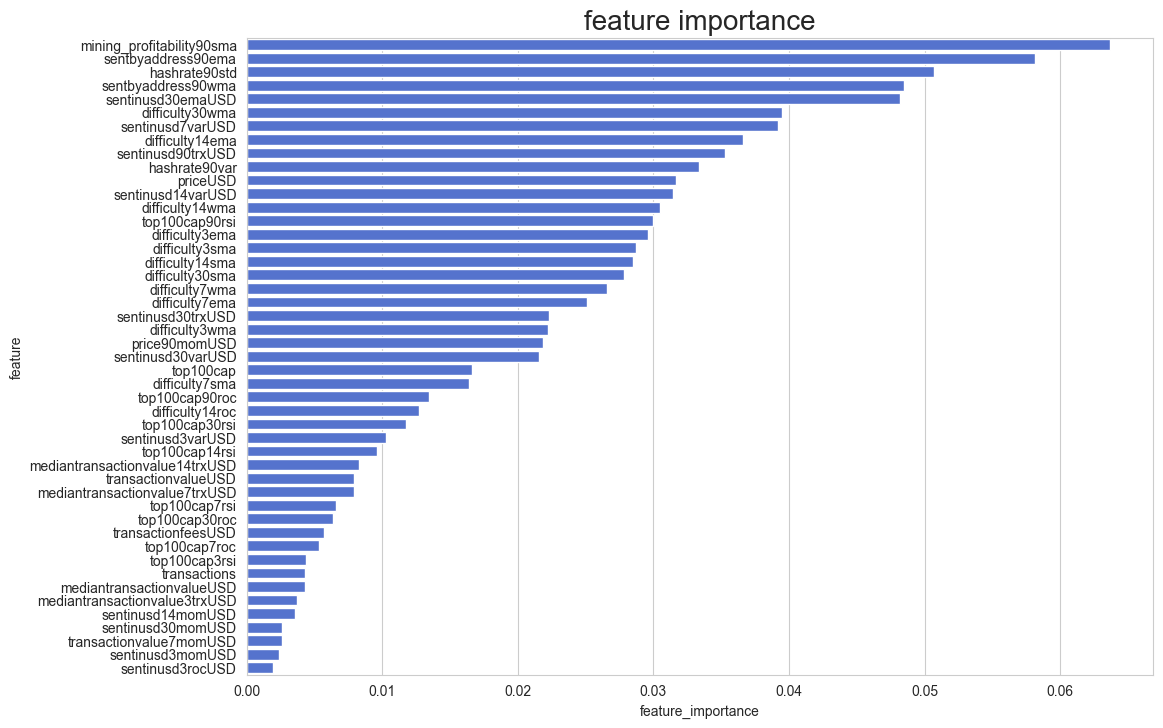

In [129]:
cmns.plot_feature_importance(imp_feat,'feature importance')

In [130]:
imp_feat[imp_feat['feature_importance']>0]


,feature,feature_importance
0,mining_profitability90sma,0.063678
1,sentbyaddress90ema,0.058132
2,hashrate90std,0.050668
3,sentbyaddress90wma,0.048514
4,sentinusd30emaUSD,0.048183
5,difficulty30wma,0.039474
6,sentinusd7varUSD,0.039190
7,difficulty14ema,0.036600
8,sentinusd90trxUSD,0.035248
9,hashrate90var,0.033377


In [131]:
cols=[8,9,10]

In [132]:
#selected=imp_feat[imp_feat['feature_importance']>0.001]
#selected=imp_feat.filter(cols,axis=0)

In [133]:
selected=imp_feat.drop(cols,axis=0)

In [134]:
selected

,feature,feature_importance
0,mining_profitability90sma,0.063678
1,sentbyaddress90ema,0.058132
2,hashrate90std,0.050668
3,sentbyaddress90wma,0.048514
4,sentinusd30emaUSD,0.048183
5,difficulty30wma,0.039474
6,sentinusd7varUSD,0.039190
7,difficulty14ema,0.036600
11,sentinusd14varUSD,0.031461
12,difficulty14wma,0.030511


In [135]:
selected.feature_importance.sum()

0.8996712855385879

In [136]:
X_high=X[selected.feature]

In [137]:
X_high.shape

(1097, 44)

In [138]:
X_high.sort_index(axis=1,inplace=True)

C:\Users\13275\AppData\Local\Temp\ipykernel_3008\554794614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_high.sort_index(axis=1,inplace=True)


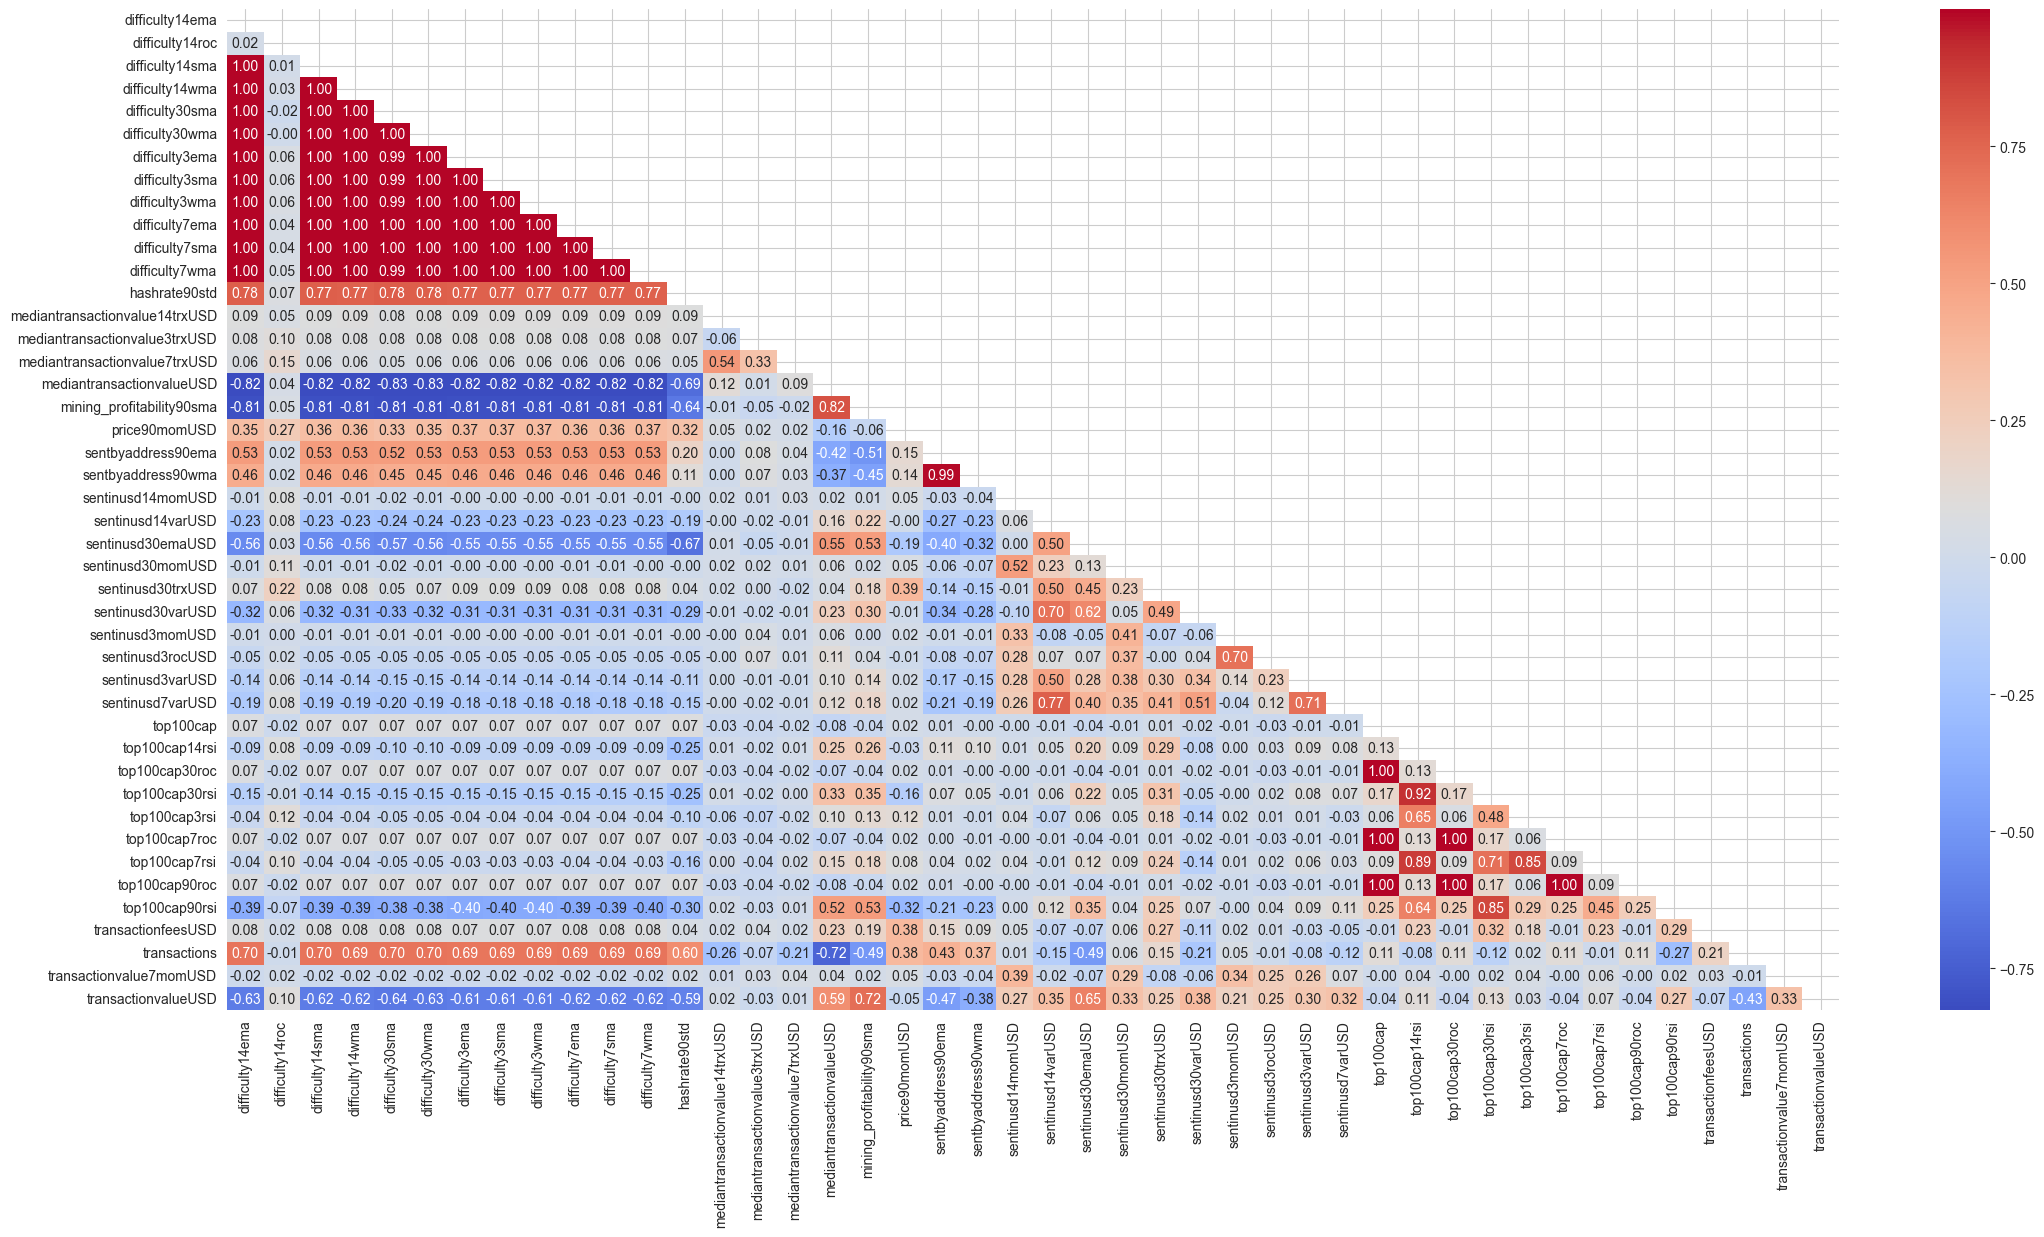

In [139]:
corr = X_high.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(26, 13))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f')

plt.show()

In [140]:
X_high['category']=np.ravel(y)

C:\Users\13275\AppData\Local\Temp\ipykernel_3008\4114579243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_high['category']=np.ravel(y)


In [141]:
X_high.shape

(1097, 45)

In [142]:
from sklearn.ensemble import IsolationForest
outlier=IsolationForest(contamination=0)
category=X_high['category']
category=category.values
category=np.reshape(category,(-1,1))
outlier.fit(category)
outs=outlier.predict(category)
X_high['outlier']=pd.DataFrame(zip(outs))
X_high=X_high.query('outlier != -1')
X_high.reset_index(drop=True,inplace=True)
X_high.drop(columns=['outlier'],inplace=True)

InvalidParameterError: The 'contamination' parameter of IsolationForest must be a str among {'auto'} or a float in the range (0.0, 0.5]. Got 0 instead.

In [143]:
X_high.shape

(1097, 45)

In [144]:
X_high.to_csv('cls_interval121-24.csv',sep=',',index=False)

In [ ]:
X_high.columns

In [ ]:
X_high